# Washington State Amazon Purchasing Behavior Analysis from 2021 - 2022

The following data mining is an exploritory analysis and prescriptive statistic for Washington State Agency's Amazon purchasing behavior. The following industry intelligence:

A list of all Washington State agencys that have purchased from Amazon.

The top 20 agencies highest spending agencies.
The varaince of spending per top 20 agencies.
The top 20 agencies most purchased item category.
The iteams in the highest spending day of the top agency.
A WordCloud generation of the most common words in the item 'description'.
The highest spending month.
The rate of spending per year covered.
A list of the top spending day per top 10 departments.


H0: There is NO association between the purchase of two or more products.

H1: There is an association between the purchase of two or more products. 

Delegate Profile:

Name: 
District: 4, Congressional District 5

Biography:
As the esteemed delegate representing District 4 within Congressional District 5, [Your Name] brings a wealth of expertise and dedication to the service of the constituents. With a background in data science and a passion for transparency and accountability, [Your Name] is committed to advocating for the interests and welfare of the community.

Data Mining Findings on Amazon Spending:
In addition to legislative duties, [Your Name] has conducted extensive data mining analyses on Amazon spending within Washington State agencies, uncovering critical insights into procurement practices and expenditure trends. Through meticulous examination of publicly available datasets, [Your Name] revealed notable patterns, including a surge in bulk purchasing by the Department of Children, Youth, and Families (DCYF) and significant expenditures by the Department of Social and Health Services (DSHS) on apparel.

Furthermore, [Your Name] discovered discrepancies and deviations from established procurement protocols, such as the Department of Corrections' substantial expenditure on bulk book purchases under the guise of emergency procurement, and the Department of Fish and Wildlife's focus on acquiring personal laptops through emergency channels.

By shedding light on these findings, [Your Name] aims to promote transparency, accountability, and prudent spending practices within state agencies. Through data-driven insights, [Your Name] advocates for informed decision-making and fiscal responsibility, ensuring taxpayer dollars are allocated efficiently and ethically.

[Your Name] is committed to leveraging their expertise in data science to inform legislative initiatives, advocate for policy reforms, and empower constituents with the knowledge and tools to hold government agencies accountable. With a dedication to serving the community and upholding the principles of integrity and transparency, [Your Name] continues to be a steadfast advocate for the people of District 4 within Congressional District 5.

In [1]:
#-- Importing liberaries --#

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#-- Importing the dataset --#
df = pd.read_csv('/Users/michaelsegaline/Desktop/Research Objectives/Washington State Amazon spendng /State_Agency_Amazon_Spend_Fiscal_Year_22 copy.csv')

# Step1 Data import and Cleaning

In [3]:
#-- Inspecting the Head --#
df.head()

,Month,Day,Year,Agency,Category,desc,Amount,Item_Qty
0,6,30,2022,NATURAL RESOURCES DEPARTMENT OF,Personal Computer,Asus,323.89,1
1,6,30,2022,NATURAL RESOURCES DEPARTMENT OF,CE,LOBKIN,15.86,2
2,6,30,2022,FISH AND WILDLIFE DEPARTMENT OF,Kitchen,ADXCO,24.85,1
3,6,30,2022,FISH AND WILDLIFE DEPARTMENT OF,Kitchen,Hawaiian Luau Party Porch Sign,23.76,2
4,6,30,2022,FISH AND WILDLIFE DEPARTMENT OF,Apparel,Hajoyful,26.98,1


In [4]:
#-- Inspecting the shape --#
df.shape

(486273, 8)

In [5]:
#-- Getting descriptive statisitcs --#
df.describe()

,Month,Day,Amount,Item_Qty
count,486273.000000,486273.000000,486096.000000,486273.000000
mean,6.290228,15.538076,90.727673,2.297423
std,3.396592,8.682386,260.139283,5.349342
min,1.000000,1.000000,0.000000,0.000000
25%,3.000000,8.000000,17.600000,1.000000
50%,6.000000,15.000000,35.910000,1.000000
75%,9.000000,23.000000,86.230000,2.000000
max,12.000000,31.000000,59075.800000,777.000000


In [6]:
#-- Drop all duplicate rows --#
df = df.drop_duplicates()
df.shape

(424156, 8)

In [7]:
#-- Dropping any rows that may have missing values --# 
df = df.dropna()

In [8]:
df.shape

(57712, 8)

In [9]:
double = 486273 - 57712
repeat = double / 486273
print(f'Repeat purchases: {double}')
print(f'Repeat pruchase %: {repeat}')


Repeat purchases: 428561
Repeat pruchase %: 0.8813176960267175


In [10]:
df.describe()

,Month,Day,Amount,Item_Qty
count,57712.000000,57712.000000,57712.000000,57712.000000
mean,4.711897,15.594071,97.400194,2.242047
std,3.187739,8.552086,245.656830,4.782808
min,1.000000,1.000000,0.000000,0.000000
25%,3.000000,9.000000,19.770000,1.000000
50%,4.000000,15.000000,40.935000,1.000000
75%,5.000000,23.000000,96.065000,2.000000
max,12.000000,31.000000,11024.440000,400.000000


Notice that the above mean amount for FY22 is 97.4. That number will be factored with the FY23 'Amount' mean.

In [11]:
invoice_count_difference = 486273 - 424156  # Assuming these represent invoice counts
sparsity = invoice_count_difference / 486273
print(f'Missing values: {invoice_count_difference}')
print(f'Sparsity %:{sparsity}')

Missing values: 62117
Sparsity %:0.12774100145391581


In [12]:
#-- Inspecting data types --#
df.dtypes

Month          int64
Day            int64
Year          object
Agency        object
 Category     object
desc          object
Amount       float64
Item_Qty       int64
dtype: object

In [13]:
# Extract numeric part of the 'Year' column and convert it to integers
df['Year'] = df['Year'].str.extract(r'(\d+)').astype(int)


In [14]:
#-- Generating a list of the unique category types --#
# Strip leading and trailing white spaces from 'Category' column
df['Category'] = df[' Category'].str.strip()
df.Category.unique()

array(['Personal Computer', 'CE', 'Kitchen', 'Apparel', 'Home',
       'Office Product', 'Lawn & Patio', 'Home Improvement',
       'Health and Beauty',
       'Business, Industrial, & Scientific Supplies Basic',
       'Car Audio or Theater', 'Sports', 'Baby Product', 'Furniture',
       'Wireless', 'Gift Card', 'Book', 'Photography', 'Lighting',
       'Automotive Parts and Accessories', 'Beauty',
       'Receiver or Amplifier', 'Toy', 'Shoes', 'Pet Products',
       'VDO Devices', 'Grocery', 'PC Accessory', 'Art and Craft Supply',
       'Premium Consumer Electronics Brands', 'Single Detail Page Misc',
       'eBooks', 'Music', 'Home Theater', 'Speakers', 'Major Appliances',
       'DVD', 'Amazon Home', 'Luggage', 'Amazon Tablets', 'Video Games',
       'Musical Instruments', 'Prestige Beauty',
       'Business, Industrial, & Scientific Supplies', 'Watch',
       'Network Media Player', 'Office Electronics', 'Pantry',
       'Digital Software', 'Target Outdoor Sporting', 'Woodworkin

In [15]:
#-- Get all column names --#
cols = list(df.columns)

#-- Find the column with leading/trailing whitespaces (might need adjustments) --#
old_name = [col for col in cols if col.strip() == 'Agency'][0]  # Finds the column that becomes 'Agency' after stripping

#-- Rename the column using df.rename --#
df = df.rename(columns={old_name: 'Agency'})
data = df['Agency']

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Month,57712.0,4.711897,3.187739,1.0,3.00,4.000,5.000,12.00
Day,57712.0,15.594071,8.552086,1.0,9.00,15.000,23.000,31.00
Year,57712.0,1546.470855,851.278364,22.0,2021.00,2022.000,2022.000,2022.00
Amount,57712.0,97.400194,245.656830,0.0,19.77,40.935,96.065,11024.44
Item_Qty,57712.0,2.242047,4.782808,0.0,1.00,1.000,2.000,400.00


# Step 2 Explore the Data

# Below is a list of all Washington State agencies whom have purchased from Amazon.

In [16]:
df.Agency.unique()

array(['NATURAL RESOURCES DEPARTMENT OF',
       'FISH AND WILDLIFE DEPARTMENT OF',
       'SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS)',
       'LABOR AND INDUSTRIES WASHINGTON STATE',
       'TRANSPORTATION DEPARTMENT OF',
       'CHILDREN YOUTH AND FAMILIES DEPT OF',
       'EMPLOYMENT SECURITY DEPARTMENT OF',
       'PARKS AND RECREATION COMMISSION WASHINGTON STATE',
       'CORRECTIONS DEPARTMENT OF',
       'CRIMINAL JUSTICE TRAINING COMMISSION WASHINGTON STATE',
       'WASHINGTON STATE PATROL', 'BLIND DEPARTMENT OF SERVICES FOR THE',
       'ENTERPRISE SERVICES DEPARTMENT OF',
       'CONSOLIDATED TECHNOLOGY SERVICES',
       'PUBLIC INSTRUCTION SUPERINTENDENT OF',
       'UTILITIES AND TRANSPORTATION COMMISSION',
       'VETERANS AFFAIRS WASHINGTON STATE DEPARTMENT OF',
       'LEGISLATIVE SUPPORT SERVICES',
       'PUBLIC EMPLOYMENT RELATIONS COMMISSION',
       'TREASURER OFFICE OF THE STATE',
       'FINANCIAL INSTITUTIONS DEPARTMENT OF',
       'ATTORNEY GENERAL OFFICE

# Below is a list of the top Washington State agencies per Amazon 21-22 spending in descending order.

In [18]:
#-- Outputting the top 20 Agencys by spending --#
top_20_agencies = df.groupby('Agency')['Amount'].sum().nlargest(20).reset_index()

top_20_agencies

,Agency,Amount
0,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),1143980.14
1,CHILDREN YOUTH AND FAMILIES DEPT OF,1119572.16
2,CORRECTIONS DEPARTMENT OF,725635.00
3,FISH AND WILDLIFE DEPARTMENT OF,345408.99
4,NATURAL RESOURCES DEPARTMENT OF,257923.98
5,TRANSPORTATION DEPARTMENT OF,236196.55
6,PUBLIC INSTRUCTION SUPERINTENDENT OF,218369.25
7,PARKS AND RECREATION COMMISSION WASHINGTON STATE,200178.88
8,LABOR AND INDUSTRIES WASHINGTON STATE,180248.99
9,WASHINGTON STATE PATROL,115464.62


# Below is a barchart of the above list:

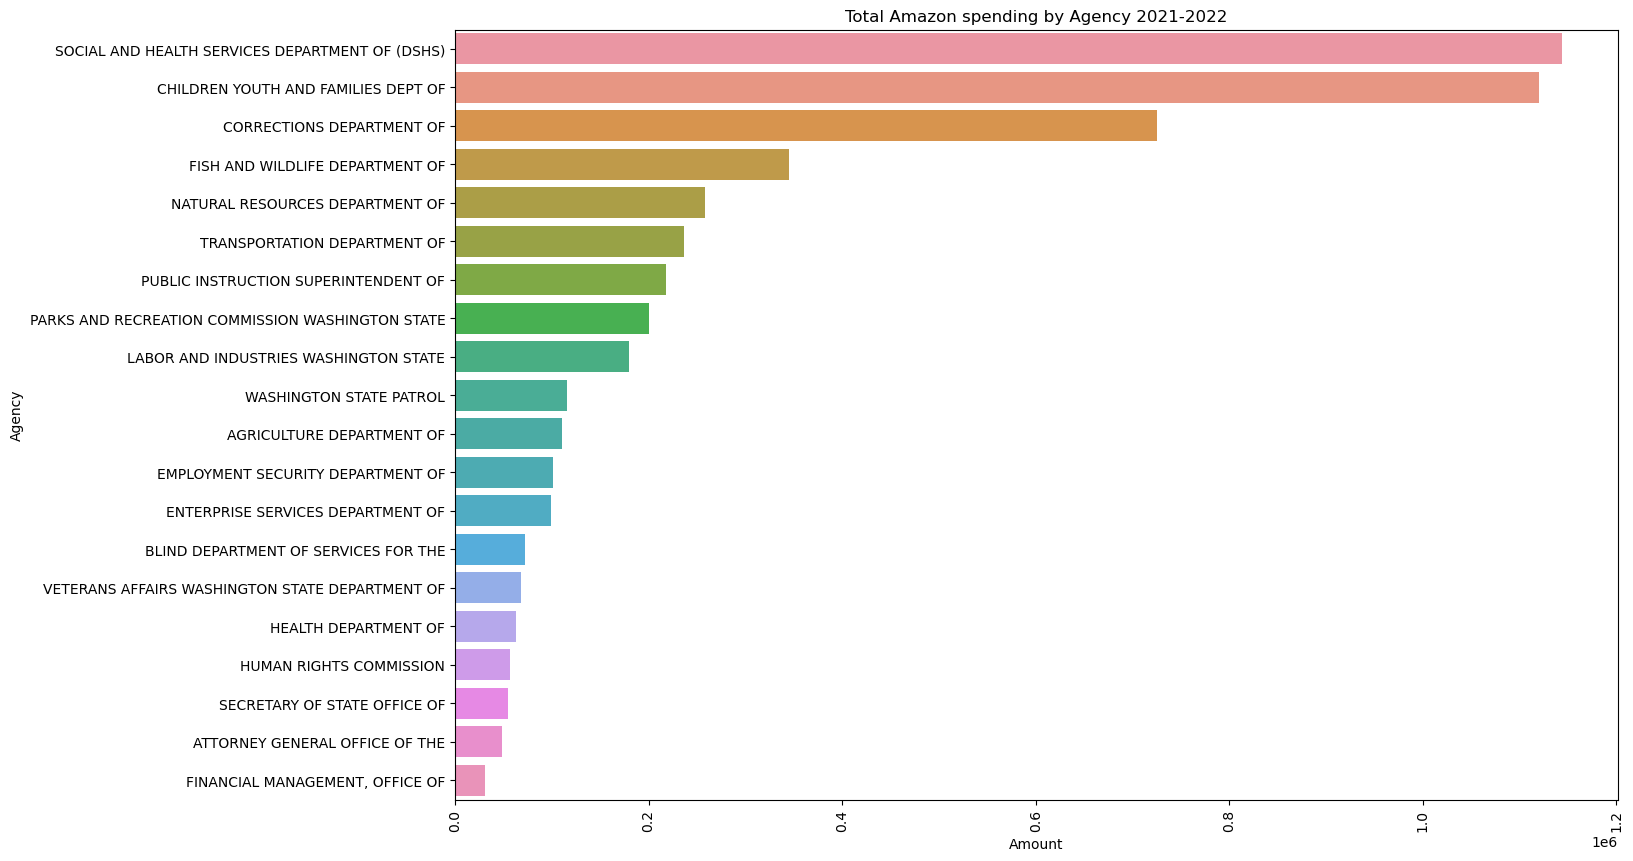

In [20]:
plt.figure(figsize=(15, 10))
sns.barplot(data = top_20_agencies, y="Agency", x= 'Amount')#top_20_agencies['Agency'], top_20_agencies['Agency']
plt.title('Total Amazon spending by Agency 2021-2022')
plt.xticks(rotation=90)
plt.show()

The above graph indicates that DSHS was leads FY22 in spending with Children Youth and Families a close second. 

# Below is the variance of spending amount per agency

In [ ]:
top_20_agency_names = top_20_agencies['Agency']
filtered_df = df_main[df_main['Agency'].isin(top_20_agency_names)]

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(y='Agency', x='Amount', data=filtered_df, palette='muted')
plt.xlabel('Agency')
plt.ylabel('Amount')
plt.title('Violin Plot of Amount Spent by Top 20 Agencies')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

According to the above graph, Socail and Health Services Department(DSHS) has the most variance in spending; Well over $25,000 and almost double the amount of the average per department. 

# Below is a list of the Top 20 agencies and their top pruchased 'Category'.

Notice that 'Personal Computer' is the most commonly purchased 'Category'.

In [ ]:
#-- Create an empty dataframe to store the results. --#
top_category_per_agency = pd.DataFrame(columns=['Agency', 'Top_Category', 'Amount_Spent'])

#-- Iterate over the top 20 agencies --#
for index, row in top_20_agencies.iterrows():
    agency_name = row['Agency']
    agency_df = df_main[df_main['Agency'] == agency_name]
    top_category = agency_df.groupby('Category')['Amount'].sum().idxmax()
    amount_spent = agency_df.groupby('Category')['Amount'].sum().max()
    top_category_per_agency = top_category_per_agency.append({'Agency': agency_name, 'Top_Category': top_category, 'Amount_Spent': amount_spent}, ignore_index=True)

top_category_per_agency

# Below a list of the top 20 categories by purchase amount

In [ ]:
#-- Outputting the top 20 Categories by Amount --#
top_20_cat = df_main.groupby('Category')['Amount'].sum().nlargest(20).reset_index()
top_20_cat

# Below is a bar graph of the above list

In [ ]:
#-- Barplot of the indicating the amount of money donated per year --#
plt.figure(figsize=(15, 10))
sns.barplot(data = top_20_cat, x="Category", y= 'Amount')#top_20_agencies['Agency'], top_20_agencies['Agency']
plt.title('Most purchased categories')
plt.xticks(rotation=90)
plt.show()

# Below is a list of the top spending day by 'Amount' per CHILDREN YOUTH AND FAMILIES

Notice the 'Market Basket' of goods between matching amounts and dates. 

In [ ]:
filtered_rows = df_main[df_main['Agency'].str.contains('CHILDREN YOUTH AND FAMILIES DEPT OF')]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

In [ ]:
filtered_rows = df_main[df_main['Agency'].str.contains("SOCIAL AND HEALTH SERVICES DEPARTMENT OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)
print('TOP 15 items DSHS spends money on:')
filtered_rows_sorted.head(15)

In [ ]:
filtered_rows = df_main[df_main['Agency'].str.contains("FISH AND WILDLIFE DEPARTMENT OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

In [ ]:
filtered_rows = df_main[df_main['Agency'].str.contains('CORRECTIONS DEPARTMENT OF')]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

In [ ]:
#-- What books are they buying --#
# Filter rows where 'Agency' is 'CORRECTIONS DEPARTMENT OF' and 'Top_Category' is 'Book'
corrections_books = df_main[(df_main['Agency'] == 'CORRECTIONS DEPARTMENT OF') & (df_main['Category'] == 'Book')]

# Print the resulting DataFrame
corrections_books


In [ ]:
#-- Saving Books to a CSV file --#
# Save the resulting DataFrame to a CSV file
corrections_books.to_csv('/Users/michaelsegaline/Desktop/Research Objectives/Washington State Amazon spendng /cleaned sets/corrections_books.csv', index=False)


In [ ]:
filtered_rows = df_main[df_main['Agency'].str.contains("NATURAL RESOURCES DEPARTMENT OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

In [ ]:
filtered_rows = df_main[df_main['Agency'].str.contains("PUBLIC INSTRUCTION SUPERINTENDENT OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

In [ ]:
filtered_rows = df_main[df_main['Agency'].str.contains("LABOR AND INDUSTRIES WASHINGTON STATE")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

In [ ]:
filtered_rows = df_main[df_main['Agency'].str.contains("PARKS AND RECREATION COMMISSION WASHINGTON STATE")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

In [ ]:
filtered_rows = df_main[df_main['Agency'].str.contains("TRANSPORTATION DEPARTMENT OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

In [ ]:
filtered_rows = df_main[df_main['Agency'].str.contains("SECRETARY OF STATE OFFICE OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

# Below is a WordCloud output of the product descriptions; Word size indicates frequency. 

In [ ]:
#-- Concatenate all text data into a single string --#
text = ' '.join(df_main["desc"])

#-- Generate the word cloud --#
wordcloud = WordCloud(width=800, height=350, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the above WordCloud, it would appear the Government likes 'Heavy Duty' and perfers the color 'Black' while white is a trailing second color preference.  

In [ ]:
#-- Create a histogram of purchase months --#
sns.histplot(
    data=df_main,      
    x="Month",  
    bins=12,          
    kde=True          
)
#-- Add a title and axis labels --#
plt.title("Distribution of purchase months")
plt.xlabel("Frequency")
plt.ylabel("Density")

# Show the plot
plt.show()

From the above graph, it appears that March, April, May, and June are the highest months, then the months remain constaint. Almost as if all departments recieved a repremanding email in July, then stayed very consistant at the 11,000 mark; Continuing from August to December. 

In [ ]:
#-- Create a histogram of Days --#
sns.histplot(
    data=df_main,        # Data source
    x="Day",  # Variable for the histogram
    bins=30,          # Number of bins (optional, defaults to 30)
    kde=True          # Add a kernel density estimate (optional)
)

# Add a title and axis labels
plt.title("Distribution of purchase days")
plt.xlabel("frequency")
plt.ylabel("Density")

# Show the plot
plt.show()

From the above graph, the purchase days of the week stay random.

In [ ]:
#-- Create a histogram of Purchase Year --#
sns.histplot(
    data=df_main,        # Data source
    x="Year",  # Variable for the histogram
    bins=2,          # Number of bins (optional, defaults to 10)
    kde=True          # Add a kernel density estimate (optional)
)

# Add a title and axis labels
plt.title("Distribution of purchase year")
plt.xlabel("frequency")
plt.ylabel("Density")

# Show the plot
plt.show()

It would appear that spending has exponentiated from 2021 to 2023

In [ ]:
#-- Create a density plot for variable 'x' --#
sns.kdeplot(
    data=df_main,
    x="Amount"  # Variable to plot the density of
)

# Add a title and axis labels
plt.title("Density Plot of Variable x")
plt.xlabel("x")
plt.ylabel("Density")

# Show the plot
plt.show()

In [ ]:
#-- Converting categorical binary with the get_dummies() function --#

dummy_categories = pd.get_dummies(df_main['Category'], drop_first=True)

dummy_categories
df1 = pd.concat([df_main['Amount'], dummy_categories], axis=1)
df1

# Step 3 Analysis with Machine Learning 

# Now exploring the data with the Unsupervised Machine Learning models of Principal Component Analysis and KMeans Cluster Analysis. 

The dataset is decomposed in to Eigen vectors of Eigen values or Principal Components PCs. The variences of PCs are explored in the following two graphs. 

In [ ]:
#-- Scaling the data --#
#-- Create the object --#
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)
 #-- Calculate the mean and Standard deviation --#
#-- Conducting PCA --#
#-- Calculating Eigenvectors and eigenvalues of Cov matrix --#
mean_vec = np.mean(df_scaled, axis=0)
cov_mat = np.cov(df_scaled.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#-- Create a list of (eigenvalue, eigenvector) tuples --#
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
#-- Sort from high to low --#
eig_pairs.sort(key = lambda x: x[0], reverse= True)
 
#-- Calculation of Explained Variance from the eigenvalues --#
tot = sum(eig_vals)
#-- Individual explained variance --#
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
#-- Cumulative explained variance --#
cum_var_exp = np.cumsum(var_exp)
 
#-- Plot out the variances superimposed --#
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [ ]:
#-- Determining the number of clusters with the Elbow Method --#
#-- Kmeans clustering with PCA --#
wcss = [] #-- sum of squares of distances of datapoints --#
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans_pca.fit(df_scaled)
    wcss.append(kmeans_pca.inertia_)
 
#-- Now plotting the Elbow Graph --#
plt.figure(figsize = (20,20))
plt.plot(range(1,15), wcss, marker ='o', linestyle ='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA clustering ')

The above graph indicates no distinct 'elbow' for the Kiaser criterion. Therefore all PCs have equal variance in vectorspace. 

In [ ]:
#-- Exploring how the data clusters when transformed with PCA and ‘k’ =1 --#

pca = PCA(n_components=22)

pca_kmeans = pca.fit_transform(df_scaled)

plt.figure(figsize = (9,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,1], c='goldenrod',alpha=0.5)

plt.ylim(-10,30)

plt.show()

In [ ]:
#-- Now running KMeans with 2 clusters --#

kmeans_pca = KMeans(n_clusters =2, init = 'k-means++', random_state = 42)

#-- Kmeans with two clusters --#

#-- Compute cluster centers by fitting the data to the model and predict cluster indices --#

X_clustered = kmeans_pca.fit_predict(pca_kmeans)

#-- Define our own color map--#

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,2], c= label_color, alpha=0.5) 

### -- Now setting  'k' = 3 clusters --#

kmeans = KMeans(n_clusters=3)

# Compute cluster centers and predict cluster indices

X_clustered = kmeans.fit_predict(pca_kmeans) 

#-- Define the color map --#

LABEL_COLOR_MAP = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'c', 5: 'm', 6: 'k'} 

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 

plt.show()

In [ ]:
#-- Now setting  'k' = 4 clusters --#

kmeans = KMeans(n_clusters=4)

# Compute cluster centers and predict cluster indices

X_clustered = kmeans.fit_predict(pca_kmeans) 

#-- Define the color map --#

LABEL_COLOR_MAP = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'c', 5: 'm', 6: 'k'} 

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 

plt.show()

The above KMeans cluster visualizations appear to be a dense random blog with scatterings of hapazard residuals.

# Now conduction Market Basket Analysis

In [ ]:
#-- Importing the parsed dataset for Market Basket Analysis --#

dfbi = pd.read_csv('/Users/michaelsegaline/Desktop/Research Objectives/Washington State Amazon spendng /Washington cleaned purchasing .csv')

In [ ]:
dfbi.head()

In [ ]:
dfbi.shape

In [ ]:
#-- Passing the entire Dataframe into a correlation Matrix --#
correlation_matrix = dfbi.corr()

In [ ]:
# Draw the heatmap using seaborn
sns.heatmap(correlation_matrix, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

# The above correlation matrix is too messy to decern. The dataframe must be split up for further exploration.

# Splitting the large dataset into four seperate datasets: 'a' and 'b' are the 1st half and 2nd half of the variables. Addtionally, 'kids' and 'electronics' are grouped together for exploration. 

In [ ]:
a = dfbi[['Apparel','Art and Craft Supply','Automotive Parts and Accessories','Baby Product','Beauty','Book','Business, Industrial, & Scientific Supplies Basic','CE','Electronic Gift Card','Furniture','Grocery','Health and Beauty','Toy']]
b = dfbi[['Kitchen','Lawn & Patio','Lighting','Luggage','MotorCycle','Office Product','PC Accessory','Personal Computer','Pet Products','Photography','Speakers','Sports','Toy','Video Games','Wireless' ]]
kids = dfbi[['Apparel','Art and Craft Supply','Baby Product','Beauty','Book','Grocery','Health and Beauty','Toy','Shoes','Video Games','Sports','Luggage','Prestige Beauty']]
electronics = dfbi[['Speakers','Lighting','Office Product','PC Accessory','Personal Computer','Video Games','Wireless']]

In [ ]:
#-- Making Seperate matrices for correlation exploration --#
matrix1 = a.corr()
matrix2 = b.corr()
matrix3 = kids.corr()
matrix4 = electronics.corr()

# Displaying correlations between random set 'a'.

In [ ]:
# Draw the heatmap using seaborn
sns.heatmap(matrix1, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

# Displaying Correlations between set 'b'

In [ ]:
sns.heatmap(matrix2, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)


# Exploring Correlations between the 'kids' iteams

In [ ]:
sns.heatmap(matrix3, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)


# Exploring corrleations between 'electronics' items. 

In [ ]:
sns.heatmap(matrix4, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

# Now running Market Basket Analysis to explore possible co-occurances of items being purhcased together. 

In [ ]:
#-- Each row represents a transaction, and each column represents an item --#
transactions = dfbi.values.tolist()

frequent_itemsets = apriori(dfbi, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)

The above Market Basket Analysis yeilded no association rules to describe the frequency of itemssets purchased together with a minimum support of 1%. Not suprising considering that the correlation matrices yeild minimal correlation between columns. Moreover, two years of data is not enough for predictive statistics. Predictive statistics is difficult given the unsemetrical pattern presented in KMeans visualizations
  
However, from the data the following industry intelligence was mined:

We accept the null hypothesis H0: There is NO association between the purchase of two or more products.

These findings and processed datasets can be compiled and compared with all and other states purchasing behavior in the United States. More compiled data over time can then be used to possibly produce accurate forecast models. 

The number of repeat purhcases as reduced from 88% (from 2021-22) to 8% in 2023
However, the spending from FY 22-23 has exponentated dramatically.
The iteams purchased are random and not predictable for cross-purchasing or bundling.

The target vairable 'Amount' was passed into numerous predictive machine learning models but no accurate score was yielded. More data needs to be compiled.  
